Loading the raw, scraped csv file and cleaning it for further use

In [62]:
import pandas as pd
import re
import numpy as np

In [63]:
df_scraped = pd.read_csv(r"C:\Users\sahil\OneDrive\Desktop\Real-Estate-Scrape-Clean-Model\scraped_listings_cards.csv")

In [64]:
df_scraped.head()

,title,listing_url,area_raw,status,floor,transaction,furnishing,facing,bhk,locality,property_id,scraped_timestamp,price_raw
0,"4 BHK Flat for Sale in Sector 107, Dadri Road...",https://www.magicbricks.com/propertyDetails/4-...,2500 sqft,Ready to Move,10 out of 21,New Property,Semi-Furnished,North - East,4,"Sector 107, Dadri Road, Noida",4d423737303639353531,2025-10-15T17:58:54.049268+00:00,₹4.40 Cr
1,"4 BHK Flat for Sale in Sector 115, Noida",https://www.magicbricks.com/propertyDetails/4-...,2799 sqft,NaN,3 out of 30,Resale,Unfurnished,East,4,"Sector 115, Noida",4d423734393234333837,2025-10-15T17:58:54.057645+00:00,₹4.25 Cr
2,"3 BHK Flat for Sale in Sector 115, Noida",https://www.magicbricks.com/propertyDetails/3-...,2304 sqft,NaN,6 out of 29,Resale,Unfurnished,North - East,3,"Sector 115, Noida",4d423733363731353533,2025-10-15T17:58:54.063499+00:00,₹3.10 Cr
3,"3 BHK Flat for Sale in Sector 115, Noida",https://www.magicbricks.com/propertyDetails/3-...,2034 sqft,NaN,4 out of 29,Resale,Semi-Furnished,North - East,3,"Sector 115, Noida",4d423737393939333233,2025-10-15T17:58:54.065990+00:00,₹3.35 Cr
4,"3 BHK Flat for Sale in Noida Extension, Noida",https://www.magicbricks.com/propertyDetails/3-...,1500 sqft,Ready to Move,16,New Property,Unfurnished,NaN,3,"Noida Extension, Noida",4d423830393239303733,2025-10-15T17:58:54.071491+00:00,₹1.35 Cr


In [65]:
df_scraped.shape

(3213, 13)

In [66]:
df_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              3213 non-null   object
 1   listing_url        3213 non-null   object
 2   area_raw           3205 non-null   object
 3   status             2467 non-null   object
 4   floor              2613 non-null   object
 5   transaction        3208 non-null   object
 6   furnishing         3074 non-null   object
 7   facing             1974 non-null   object
 8   bhk                3213 non-null   int64 
 9   locality           3213 non-null   object
 10  property_id        3213 non-null   object
 11  scraped_timestamp  3213 non-null   object
 12  price_raw          3213 non-null   object
dtypes: int64(1), object(12)
memory usage: 326.4+ KB


In [67]:
df_scraped.columns.tolist()

['title',
 'listing_url',
 'area_raw',
 'status',
 'floor',
 'transaction',
 'furnishing',
 'facing',
 'bhk',
 'locality',
 'property_id',
 'scraped_timestamp',
 'price_raw']

In [68]:
df_scraped.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,3213,488,"3 BHK Flat for Sale in Noida Extension, Noida",349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listing_url,3213,1878,https://www.magicbricks.com/propertyDetails/3-...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_raw,3205,657,1500 sqft,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,2467,1,Ready to Move,2467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,2613,555,1 out of 4,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction,3208,3,Resale,2461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furnishing,3074,3,Semi-Furnished,1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
facing,1974,8,North - East,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bhk,3213.0,NaN,NaN,NaN,3.269841,0.819487,1.0,3.0,3.0,4.0,5.0
locality,3213,295,"Noida Extension, Noida",467,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# --- Define Price Cleaning Function ---
def clean_price(price):
    if pd.isna(price) or price == 'Price on Request':
        return np.nan

    # Remove currency symbol and commas
    price = str(price).replace('₹', '').replace(',', '').strip()

    # Check for unit (Cr or Lac)
    if 'Cr' in price:
        # Convert Crores to Lakhs (1 Cr = 100 Lakhs)
        try:
            value = float(re.findall(r"(\d+\.?\d*)", price)[0])
            return value * 100
        except:
            return np.nan
    elif 'Lac' in price:
        # Convert Lac to Lakhs (already in lakhs)
        try:
            value = float(re.findall(r"(\d+\.?\d*)", price)[0])
            return value
        except:
            return np.nan
    else:
        # Catch any remaining outliers or strange formats
        return np.nan

In [70]:
df_scraped['price_in_lacs'] = df_scraped['price_raw'].apply(clean_price)

In [71]:
print("Price distribution after cleaning:")
print(df_scraped['price_in_lacs'].describe())

Price distribution after cleaning:
count    3142.000000
mean      317.788988
std       307.974665
min         1.000000
25%       125.000000
50%       220.000000
75%       400.000000
max      2350.000000
Name: price_in_lacs, dtype: float64


In [72]:
df_scraped['price_in_lacs']

0       440.0
1       425.0
2       310.0
3       335.0
4       135.0
        ...  
3208    440.0
3209    440.0
3210    440.0
3211    440.0
3212    440.0
Name: price_in_lacs, Length: 3213, dtype: float64

In [73]:
df_scraped = df_scraped.drop(columns=['price_raw'])

In [74]:
df_scraped['area_raw'].unique()

array(['2500 sqft', '2799 sqft', '2304 sqft', '2034 sqft', '1500 sqft',
       '2794 sqft', '2105 sqft', '1650 sqft', '4085 sqft', '2827 sqft',
       '2405 sqft', '1000 sqft', '2350 sqft', '4075 sqft', '1150 sqft',
       '1995 sqft', '1395 sqft', '6300 sqft', '300 sqm', '1577 sqft',
       '4507 sqft', '2166 sqft', '1020 sqft', '1810 sqft', '1755 sqft',
       '400 sqft', '450 sqm', '1086 sqft', '1076 sqft', '1250 sqft',
       '4100 sqft', '922 sqft', '1130 sqft', '1860 sqft', '2150 sqft',
       '1800 sqft', '844 sqft', '1300 sqft', '1380 sqft', '200 sqm',
       '1560 sqft', '1484 sqft', '1900 sqft', '2400 sqft', '820 sqft',
       '833 sqft', '2600 sqft', '1275 sqft', '1350 sqft', '1608 sqft',
       '1795 sqft', '2085 sqft', '1313 sqft', '2845 sqft', '2200 sqft',
       '2251 sqft', '1208 sqft', '1400 sqft', '4775 sqft', '1440 sqft',
       '3200 sqft', '3225 sqft', '4208 sqft', '1775 sqft', '3904 sqft',
       '1565 sqft', '1974 sqft', '3341 sqft', '3987 sqft', '1205 sqft',
   

In [75]:
# --- Define Area Cleaning Function ---
def clean_area(area_str):
    if pd.isna(area_str):
        return np.nan

    # Remove everything inside parentheses (e.g., '2 BHK (1000 sqyrd)')
    area_str = re.sub(r'\([^)]*\)', '', str(area_str))

    # Extract the numeric value
    match = re.search(r"(\d{1,3}(,\d{3})*(\.\d+)?)\s*(sqft|sq m|sqyrd)", area_str, re.IGNORECASE)

    if match:
        value = float(match.group(1).replace(',', ''))
        unit = match.group(4).lower()

        if 'sqft' in unit:
            return value  # Already in sqft
        elif 'sqyrd' in unit:
            return value * 9.0  # 1 sqyrd = 9 sqft
        elif 'sqm' in unit:
            return value * 10.764 # 1 sq m = 10.764 sqft
        else:
            return value
    else:
        return np.nan

In [76]:
df_scraped['area_sqft'] = df_scraped['area_raw'].apply(clean_area)

In [77]:
df_scraped['area_sqft'].value_counts()

area_sqft
0.0      155
500.0    131
200.0    128
300.0    126
400.0     95
        ... 
206.0      1
210.0      1
266.0      1
787.0      1
616.0      1
Name: count, Length: 404, dtype: int64

In [78]:
df_scraped['area_sqft'].describe()

count     2990.000000
mean       453.883612
std        577.484687
min          0.000000
25%        200.000000
50%        415.000000
75%        700.000000
max      28000.000000
Name: area_sqft, dtype: float64

In [79]:
df_scraped = df_scraped.drop(columns = ['area_raw'])

In [80]:
df_scraped['floor'].head()

0    10 out of 21
1     3 out of 30
2     6 out of 29
3     4 out of 29
4              16
Name: floor, dtype: object

In [89]:
def extract_floor_details(text):
    if pd.isna(text):
        return (np.nan, np.nan)

    text = text.lower().strip()

    # Case 1: Matches patterns like "3 out of 10", "5 of 12", "3 / 10"
    match = re.search(r'(\d+)\s*(?:out of|of|/)\s*(\d+)', text)
    if match:
        return (float(match.group(1)), float(match.group(2)))

    # Case 2: Matches floor number only — e.g., "3rd floor", "5th", "16 floor", or even just "16"
    match = re.search(r'(\d+)(?:st|nd|rd|th)?(?:\s*floor)?', text)
    if match:
        return (float(match.group(1)), np.nan)

    # Case 3: Special floor names
    if "ground" in text:
        return (0.0, np.nan)
    if "basement" in text:
        return (-1.0, np.nan)
    if "lower" in text:
        return (-2.0, np.nan)
    if "upper" in text:
        return (1.0, np.nan)

    return (np.nan, np.nan)

In [90]:
df_scraped[['floor_no', 'total_floors']] = df_scraped['floor'].apply(lambda x: pd.Series(extract_floor_details(x)))

In [91]:
df_scraped[['floor','floor_no','total_floors']].head()

,floor,floor_no,total_floors
0,10 out of 21,10.0,21.0
1,3 out of 30,3.0,30.0
2,6 out of 29,6.0,29.0
3,4 out of 29,4.0,29.0
4,16,16.0,NaN


In [49]:
df_scraped['bhk'].value_counts()

bhk
3    2022
4     791
5     219
1     181
Name: count, dtype: int64

In [95]:
df_scraped['locality'].isna().value_counts()

locality
False    3213
Name: count, dtype: int64

In [99]:
# Price is in Lakhs, so we must multiply by 100,000 to get total Rupees before dividing by area
# New Column: price_per_sqft
df_scraped['price_per_sqft'] = (df_scraped['price_in_lacs'] * 100000) / df_scraped['area_sqft']

In [101]:
df_scraped['price_per_sqft'].head()

0     88000.000000
1     53191.489362
2    101973.684211
3    985294.117647
4     27000.000000
Name: price_per_sqft, dtype: float64

Imputing missing area

In [102]:
df_scraped['area_sqft'].isna().sum()

np.int64(223)

<Axes: xlabel='area_sqft', ylabel='Density'>

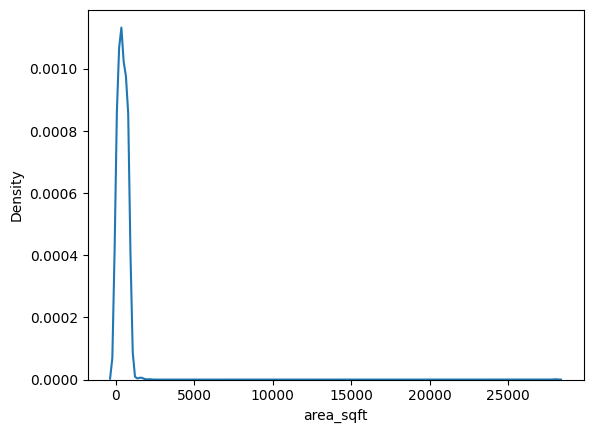

In [106]:
import seaborn as sns
sns.kdeplot(df_scraped['area_sqft'])

In [109]:
from sklearn.impute import SimpleImputer
area_imputer = SimpleImputer(strategy='median')
df_scraped['area_sqft_imputed'] = area_imputer.fit_transform(df_scraped[['area_sqft']])

In [111]:
df_scraped['area_sqft_imputed'].isna().sum()

np.int64(0)

In [112]:
df_scraped = df_scraped.drop(columns=['area_sqft'])

In [113]:
missing_report = df_scraped.isna().sum().sort_values(ascending=False)

# Filter the report to only show columns with missing values and display as a percentage
missing_data = missing_report[missing_report > 0]
missing_data_pct = (missing_data / len(df_scraped)) * 100

print("--- Missing Value Report (Count and Percentage) ---")
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_data_pct.round(2)
})

print(missing_df)

--- Missing Value Report (Count and Percentage) ---
                Missing Count  Missing %
facing                   1239      38.56
status                    746      23.22
total_floors              731      22.75
floor                     600      18.67
floor_no                  600      18.67
price_per_sqft            285       8.87
furnishing                139       4.33
price_in_lacs              71       2.21
transaction                 5       0.16


Imputing Numeric Columns (total_floors & price_per_sqft)

In [119]:
df_scraped.replace([np.inf, -np.inf], np.nan, inplace=True)
median_imputer = SimpleImputer(strategy='median')
df_scraped['price_per_sqft'] = median_imputer.fit_transform(df_scraped[['price_per_sqft']])

In [120]:
# 1. Impute total_floors
df_scraped['total_floors'] = median_imputer.fit_transform(df_scraped[['total_floors']])

# 'facing' (33.42% missing) -> Fill with the explicit category 'Missing'
df_scraped['facing'] = df_scraped['facing'].fillna('Missing')

# 'status' (0.03% missing) -> Fill with the explicit category 'Unknown'
df_scraped['status'] = df_scraped['status'].fillna('Unknown')

In [124]:
df_scraped['floor_number'] = df_scraped['floor_no'].astype('Int64')
df_scraped['total_floors'] = df_scraped['total_floors'].astype('Int64')

In [141]:
df_scraped[['floor', 'floor_number', 'floor_no', 'total_floors']].head()

,floor,floor_number,floor_no,total_floors
0,10 out of 21,10,10.0,21
1,3 out of 30,3,3.0,30
2,6 out of 29,6,6.0,29
3,4 out of 29,4,4.0,29
4,16,16,16.0,22


In [146]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df_scraped['floor_number'] = median_imputer.fit_transform(df_scraped[['floor_number']]).ravel()
df_scraped['furnishing'] = mode_imputer.fit_transform(df_scraped[['furnishing']]).ravel()
df_scraped['furnishing'] = df_scraped['furnishing'].astype(str)
df_scraped['transaction'] = mode_imputer.fit_transform(df_scraped[['transaction']]).ravel()
df_scraped['transaction'] = df_scraped['transaction'].astype(str)

In [147]:
df_scraped['floor_number'] = df_scraped['floor_number'].astype('Int64', errors='ignore')
df_scraped['total_floors'] = df_scraped['total_floors'].astype('Int64', errors='ignore')

In [150]:
df_scraped[['floor_number', 'floor_no', 'floor', 'total_floors']]

,floor_number,floor_no,floor,total_floors
0,10,10.0,10 out of 21,21
1,3,3.0,3 out of 30,30
2,6,6.0,6 out of 29,29
3,4,4.0,4 out of 29,29
4,16,16.0,16,22
...,...,...,...,...
3208,10,10.0,10 out of 21,21
3209,10,10.0,10 out of 21,21
3210,10,10.0,10 out of 21,21
3211,10,10.0,10 out of 21,21


In [164]:
df_scraped.drop(columns = 'floor_no', inplace=True)

In [165]:
df_scraped.columns

Index(['title', 'listing_url', 'status', 'floor', 'transaction', 'furnishing',
       'facing', 'bhk', 'locality', 'property_id', 'scraped_timestamp',
       'price_in_lacs', 'total_floors', 'price_per_sqft', 'area_sqft_imputed',
       'floor_number'],
      dtype='object')

In [166]:
df_scraped = df_scraped.drop(columns=['floor'], errors='ignore')

In [167]:
df_scraped.to_csv("cleaned_noida_listings.csv", index=False)
print("Cleaned data saved")

Cleaned data saved
